# Kriging Example1

- Author: Mohit S. Chauhan 
- Date: Jan 08, 2019

In this example, Kriging is used to generate a surrogate model for a given data. In this data, sample points are generated using STS class and functional value at sample points are estimated using a model defined in python script ('python_model_function.py).

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS, RunModel and Krig class from UQpy.

In [1]:
from UQpy.surrogates import Kriging
from UQpy.utilities.strata import RectangularStrata
from UQpy.sampling import StratifiedSampling
from UQpy.RunModel import RunModel
from UQpy.distributions import Gamma
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.List[typing.Callable] deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecate

Create a distribution object.

In [2]:
marginals = [Gamma(a=2., loc=1., scale=3.)]

Create a strata object.

In [3]:
strata = RectangularStrata(strata_number=[20])

Run stratified sampling

In [4]:
x = StratifiedSampling(distributions=marginals, strata_object=strata,
                       samples_per_stratum_number=1, random_state=2)

RunModel is used to evaluate function values at sample points. Model is defined as a function in python file 'python_model_function.py'.

In [5]:
rmodel = RunModel(model_script='python_model_1Dfunction.py', delete_files=True)
rmodel.run(samples=x.samples)

In [6]:
from UQpy.surrogates.kriging.regression_models import Linear
from UQpy.surrogates.kriging.correlation_models import Gaussian
from UQpy.optimization.MinimizeOptimizer import MinimizeOptimizer

optimizer = MinimizeOptimizer(method="L-BFGS-B")
K = Kriging(regression_model=Linear(), correlation_model=Gaussian(), optimizer=optimizer,
            optimizations_number=20, correlation_model_parameters=[1], random_state=2)
K.fit(samples=x.samples, values=rmodel.qoi_list)
print(K.correlation_model_parameters)

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/optimization/MinimizeOptimizer.py:24: OptimizeWarning: Unknown solver options: catol
  return minimize(function, initial_guess, args=args,
/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/surrogates/kriging/Kriging.py:328: RuntimeWarning: invalid value encountered in log
  ll = (ll + ( np.log(np.linalg.det(sigma_[out_dim] * r__)) + m * (np.log(2 * np.pi) + 1)) / 2)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *
True
23.90598760735558

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.91313D+01    |proj g|=  9.99000D-01

At iterate    1    f= -8.91313D+01    |proj g|=  9.99000D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     1   9.990D-01  -8.913D+01
  F =  -89.131318614113752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =         


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


ction evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   2.837D+01
  F =   28.365243561352226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


Kriging surrogate is used to compute the response surface and its gradient.

In [7]:
num = 1000
x1 = np.linspace(min(x.samples), max(x.samples), num)

y, y_sd = K.predict(x1.reshape([num, 1]), return_std=True)
y_grad = K.jacobian(x1.reshape([num, 1]))

Actual model is evaluated at all points to compare it with kriging surrogate.

In [8]:
rmodel.run(samples=x1, append_samples=False)

This plot shows the input data as blue dot, blue curve is actual function and orange curve represents response curve. This plot also shows the gradient and 95% confidence interval of the kriging surrogate.

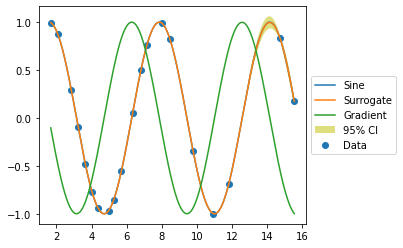

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(x1, rmodel.qoi_list, label='Sine')
plt.plot(x1, y, label='Surrogate')
plt.plot(x1, y_grad, label='Gradient')
plt.scatter(K.samples, K.values, label='Data')
plt.fill(np.concatenate([x1, x1[::-1]]), np.concatenate([y - 1.9600 * y_sd,
                                                         (y + 1.9600 * y_sd)[::-1]]),
         alpha=.5, fc='y', ec='None', label='95% CI')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()